In [0]:
import io
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
import math
import seaborn as sns
sns.set()

In [0]:
#Cargamos los archivos desde el panel izquierdo y después corremos este código

testdata = [1,3,4,5,6,7,8,9,10,12,13,14] #Para excluir la medición test_data_2 y test_data_11
data = []
for i in testdata:
  data.append(np.loadtxt('test_data_{}'.format(i)))
             

data14 = np.loadtxt('CAL_DIN.TXT')
data15 = np.loadtxt('maxs_cal-est.txt')
data16 = np.loadtxt('mins_cal-est.txt')
data17 = np.loadtxt('proms_cal-est.txt')

In [0]:
data14

array([[ 5494.,     0.],
       [ 5603.,     0.],
       [ 5684.,     0.],
       ...,
       [66456.,   220.],
       [66538.,   189.],
       [66619.,    97.]])

In [0]:
"""
data[0] es del S1 , lenta sobre telgopor
data[1] es del S1, rapidas sobre telgopor
data[2] es del S1, rotando la moneda sobre telgopor

data[3] es del S2, lenta sobre telgopor
data[4] es del S2, rápida, sobre telgopor
data[5] es del S2, rotando sobre telgopor

data[6] es del S3, lenta sobre el telgopor
data[7] es del S3, rapida sobre el telgopor
data[8] es del S3, rotando sobre telgopor

data[9] es del S1, sobre Jose
data[10] es del S2, sobre Jose
data[11] es del S3, sobre Jose
"""

In [0]:
#uploaded2 = files.upload() #archivo CAL_DIN.TXT

Saving CAL_DIN.TXT to CAL_DIN (2).TXT


In [0]:
# CARGAR los archivos maxs/mins/proms_cal-est.txt
"""
data1 = pd.read_csv(io.BytesIO(uploaded['test_data_1']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger']) 
data0 = pd.read_csv(io.BytesIO(uploaded['test_data_2']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger']) #La de Nacho
data2 = pd.read_csv(io.BytesIO(uploaded['test_data_3']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger'])
data3 = pd.read_csv(io.BytesIO(uploaded['test_data_4']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger'])
data4 = pd.read_csv(io.BytesIO(uploaded['test_data_5']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger'])
data5 = pd.read_csv(io.BytesIO(uploaded['test_data_6']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger'])
data6 = pd.read_csv(io.BytesIO(uploaded['test_data_7']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger'])
data7 = pd.read_csv(io.BytesIO(uploaded['test_data_8']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger'])
data8 = pd.read_csv(io.BytesIO(uploaded['test_data_9']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger'])
data9 = pd.read_csv(io.BytesIO(uploaded['test_data_10']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger'])
#data10 = pd.read_csv(io.BytesIO(uploaded['test_data_11']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger'])
data10 = pd.read_csv(io.BytesIO(uploaded['test_data_12']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger'])
data11 = pd.read_csv(io.BytesIO(uploaded['test_data_13']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger'])
data12 = pd.read_csv(io.BytesIO(uploaded['test_data_14']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger'])
data14 = pd.read_csv(io.BytesIO(uploaded2['CAL_DIN.TXT']),sep='\t',header=None,names = ['tiempo', 'lectura'])
data15 = np.loadtxt('maxs_cal-est.txt')
data16 = np.loadtxt('mins_cal-est.txt')
data17 = np.loadtxt('proms_cal-est.txt')

"""

In [0]:
#Corto los datos del sensor para cada medición (archivo CAL_DIN en data14)

tanda_prueba = data14[:196] #prueba de tiempos
tanda_ni_idea = data14[197:228]
tanda1 = data14[353:1026] #desde el 229 originalmente, pero sacamos los primeros 10" porque medía 0
tanda2 = data14[1027:1832]
tanda3 = data14[1833:2622]
tanda4 = data14[2722:3378] #2623 idem
tanda5 = data14[3379:4131]
tanda6 = data14[4132:4896]
tanda7 = data14[4897:5658]
tanda8 = data14[5659:6409]
tanda9 = data14[6410:7183]
tanda10 = data14[7958:8720]
tanda11 = data14[8721:9475]
tanda12 = data14[9476:10217]
largo = np.arange(1,13)

tanda = [tanda1, tanda2, tanda3, tanda4, tanda5, tanda6, tanda7, tanda8, tanda9, tanda10, tanda11, tanda12]

In [0]:
#Corto los datos del sensor para cada medición (archivo CAL_DIN en data14)

tanda_prueba = data14[:196] #prueba de tiempos
tanda_ni_idea = data14[196:227]
tanda1 = data14[350:1023] #desde el 229 originalmente, pero sacamos los primeros 10" porque medía 0
tanda2 = data14[1023:1828]
tanda3 = data14[1828:2617]
tanda4 = data14[2718:3372] #2623 idem
tanda5 = data14[3372:4124]
tanda6 = data14[4124:4888]
tanda7 = data14[4888:5649]
tanda8 = data14[5649:6399]
tanda9 = data14[6399:7172]
tanda10 = data14[7947:8706]
tanda11 = data14[8706:9460]
tanda12 = data14[9463:10195]
largo = np.arange(1,13)

tanda = [tanda1, tanda2, tanda3, tanda4, tanda5, tanda6, tanda7, tanda8, tanda9, tanda10, tanda11, tanda12]

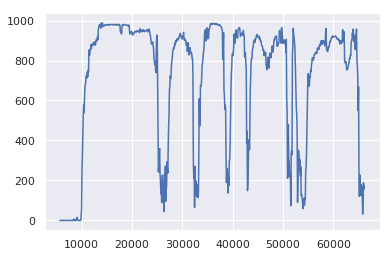

In [4]:
plt.plot(tanda12[:,0],tanda12[:,1])

In [0]:
def fuerza(volt):
  a=26.78885525
  b=-67.40046261
  sigma_a=0.05
  sigma_b=0.05
  f = a*volt + b
  return f

def redondeo(tiempo_S):
  tiempo = []
    
  for i in tiempo_S:
    tiempo_aux = int(i*100)/2
    if tiempo_aux-int(tiempo_aux)==0:
      tiempo.append(tiempo_aux*2/100)
      
    else:
      tiempo.append((tiempo_aux*2 + 1)/100)
    
  return tiempo

In [0]:

#offset en intervalos de 20 segundos
offset=np.matrix([[10.08,10.28,10.48], # a partir de 10.5 segundos sumándole los tiempos cortaados
                 [0.84,1.02,1.26],
                 [0.84,0.9,1.2],
                 [8.26,8.36,8.56], # a partir de 9 segundos
                 [0.5,0.66,0.86],
                 [1.2,1.3,1.4],
                 [0.16,0.36,0.56], #hasta 58 segundos
                 [0.9,1.04,1.22], #hasta 59 segundos
                 [0.64,0.88,1.02],
                 [0.68,0.8,0.92],
                 [0.5,0.54,0.74],
                 [0.36,0.58,0.68],
                 [0.64,0.86,1.14]]) #segundos

                 


In [0]:
#offset en intervalos de 20 segundos
offset=np.matrix([[10.34,10.44,10.74], # a partir de 10.5 segundos sumándole los tiempos cortaados
                 [1.14,1.38,1.56],
                 [1.14,1.26,1.6],
                 [8.62,8.76,8.96], # a partir de 9 segundos
                 [1.02,1.22,1.44],
                 [1.74,1.84,1.94],
                 [0.7,0.9,1.1], #hasta 58 segundos
                 [1.64,1.88,2.06], #hasta 59 segundos
                 [1.44,1.68,1.82],
                 [1.48,1.64,1.86],
                 [1.48,1.74,1.94],
                 [1.96,2.18,2.38]]) #segundos

In [0]:
long = len(data[0][:,0])
#Defino tiempo y fuerza del sensor Vernier
Tiempo_V=[]
Fuerza_V=[]
for i in range(12):
  Tiempo_Vaux = []
  Fuerza_Vaux = []
  for j in range(long):
    Tiempo_Vaux.append(np.array(round(data[i][j,0],2)))
    Fuerza_Vaux.append(np.array(fuerza(data[i][j,1])))
  Tiempo_V.append(Tiempo_Vaux)
  Fuerza_V.append(Fuerza_Vaux)

#Redefino tiempos Sensores restando offset inicial y el voltaje lo paso a V  
Tiempo_S=[]
Voltaje_S=[]
for i in range(12): 
  Tiempo_S.append(redondeo((tanda[i][:,0] - tanda[i][0,0])/1000))
  Voltaje_S.append(tanda[i][:,1]*5/1023)
  #Tiempo_S.append(np.array(redondeo(np.array((eval('tanda'+str(i)).tiempo-eval('tanda'+str(i)).tiempo.iloc[0])/1000))))
  #Voltaje_S.append(np.array(eval('tanda'+str(i)).lectura*5/1023))

#Redefino tiempos Sensores restando offset delay
Tiempo_Sensor=[]
Voltaje_Sensor=[]
for i in range(12):
  T=[]
  V=[]
  for j in range(len(Tiempo_S[i])):
    if 0<=Tiempo_S[i][j]<20:
      T.append(round(Tiempo_S[i][j]+offset[i,0],2))
      V.append(Voltaje_S[i][j])
    elif 20<=Tiempo_S[i][j]<40:
      T.append(round(Tiempo_S[i][j]+offset[i,1],2))
      V.append(Voltaje_S[i][j])
    elif 40<=Tiempo_S[i][j]<60:
      if Tiempo_S[i][j]+offset[i,2]<60:
        T.append(round(Tiempo_S[i][j]+offset[i,2],2))
        V.append(Voltaje_S[i][j])
  Tiempo_Sensor.append(T) 
  Voltaje_Sensor.append(V)

Tiempo_Vernier=[]
Fuerza_Vernier=[] 
for i in range(12):
  indices_selec=[]
  Tv, Fv = [], []
  for t in Tiempo_Sensor[i]:
    if 0<=t<60:
      indices_selec.append(int(Tiempo_V[i].index(t)))
      Tv.append(Tiempo_V[i][indices_selec[-1]])
      Fv.append(Fuerza_V[i][indices_selec[-1]])
  Tiempo_Vernier.append(Tv)
  Fuerza_Vernier.append(Fv) 

Voltaje_error=[] #La semidiferencia entre dos voltajes seguidos. Juega el rol de error por mala corrección en tiempos
for i in range(12):
  erraux=[]
  for j in range(len(Voltaje_Sensor[i])-1):
    erraux.append(np.abs(Voltaje_Sensor[i][j+1]-Voltaje_Sensor[i][j])/2)
  erraux.append(erraux[-1])
  Voltaje_error.append(erraux)
#Defino el error de voltaje del Sensor (calculado en Calibracion_estatica.ipynb) y del Vernier sacado del manual

err_Voltaje = 0.143 #Lo que oscila el voltaje en una medicion "constante"

Error_Voltaje=[]
err_Fuerza = 0.05
for i in range(len(Voltaje_error)):
  Error_Voltaje.append(np.sqrt(np.array(Voltaje_error[i])**2+err_Voltaje**2))

¡¡¡ LA SIGUIENTE LINEA SOLO SE CORRE UNA VEZ !!!

In [0]:
#CORRER UNA SOLA VEZ, Corta los datos que están mal
Tiempo_Sensor[2] = Tiempo_Sensor[2][:-5]
Voltaje_Sensor[2] = Voltaje_Sensor[2][:-5]

Tiempo_Vernier[2] = Tiempo_Vernier[2][:-5]
Fuerza_Vernier[2] = Fuerza_Vernier[2][:-5]

Tiempo_Sensor[4] = Tiempo_Sensor[4][:-7]
Voltaje_Sensor[4] = Voltaje_Sensor[4][:-7]

Tiempo_Vernier[4] = Tiempo_Vernier[4][:-7]
Fuerza_Vernier[4] = Fuerza_Vernier[4][:-7]

Tiempo_Sensor[7] = Tiempo_Sensor[7][:-10]
Voltaje_Sensor[7] = Voltaje_Sensor[7][:-10]

Tiempo_Vernier[7] = Tiempo_Vernier[7][:-10]
Fuerza_Vernier[7] = Fuerza_Vernier[7][:-10]

In [0]:
#Defino tiempo y fuerza del sensor Vernier
"""
Tiempo_V=[]
Fuerza_V=[]
for i in largo: 
  Tiempo_V.append(np.array(round(eval('data'+str(i)).tiempo,2)))
  Fuerza_V.append(np.array(fuerza(eval('data'+str(i)).lectura)))

#Redefino tiempos Sensores restando offset inicial y el voltaje lo paso a V  
Tiempo_S=[]
Voltaje_S=[]
for i in largo: 
  Tiempo_S.append(np.array(redondeo(np.array((eval('tanda'+str(i)).tiempo-eval('tanda'+str(i)).tiempo.iloc[0])/1000))))
  Voltaje_S.append(np.array(eval('tanda'+str(i)).lectura*5/1023))

#Redefino tiempos Sensores restando offset delay
Tiempo_Sensor=[]
Voltaje_Sensor=[]
for i in range(12):
  T=[]
  V=[]
  for j in range(len(Tiempo_S[i])):
    if 0<=Tiempo_S[i][j]<20:
      T.append(round(Tiempo_S[i][j]+offset[i,0],2))
      V.append(Voltaje_S[i][j])
    elif 20<=Tiempo_S[i][j]<40:
      T.append(round(Tiempo_S[i][j]+offset[i,1],2))
      V.append(Voltaje_S[i][j])
    elif 40<=Tiempo_S[i][j]<60:
      if Tiempo_S[i][j]+offset[i,2]<60:
        T.append(round(Tiempo_S[i][j]+offset[i,2],2))
        V.append(Voltaje_S[i][j])
  Tiempo_Sensor.append(T) 
  Voltaje_Sensor.append(V)

Tiempo_Vernier=[]
Fuerza_Vernier=[] 
for i in range(12):
  indices_selec=[]
  for t in Tiempo_Sensor[i]:
    if 0<=t<60:
      indices_selec.append(int(list(Tiempo_V[i]).index(t)))
  Tiempo_Vernier.append(Tiempo_V[i][indices_selec])
  Fuerza_Vernier.append(Fuerza_V[i][indices_selec]) 

Voltaje_error=[] #La semidiferencia entre dos voltajes seguidos. Juega el rol de error por mala corrección en tiempos
for i in range(12):
  erraux=[]
  for j in range(len(Voltaje_Sensor[i])-1):
    erraux.append(np.abs(Voltaje_Sensor[i][j+1]-Voltaje_Sensor[i][j])/2)
  erraux.append(erraux[-1])
  Voltaje_error.append(erraux)
#Defino el error de voltaje del Sensor (calculado en Calibracion_estatica.ipynb) y del Vernier sacado del manual

err_Voltaje = 0.143 #Lo que oscila el voltaje en una medicion "constante"

Error_Voltaje=[]
err_Fuerza = 0.05
for i in range(len(Voltaje_error)):
  Error_Voltaje.append(np.sqrt(np.array(Voltaje_error[i])**2+err_Voltaje**2))

"""

<Figure size 720x504 with 0 Axes>

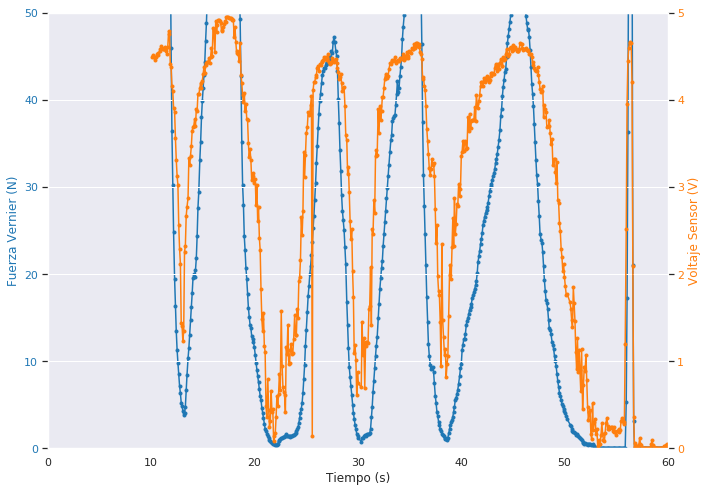

<Figure size 720x504 with 0 Axes>

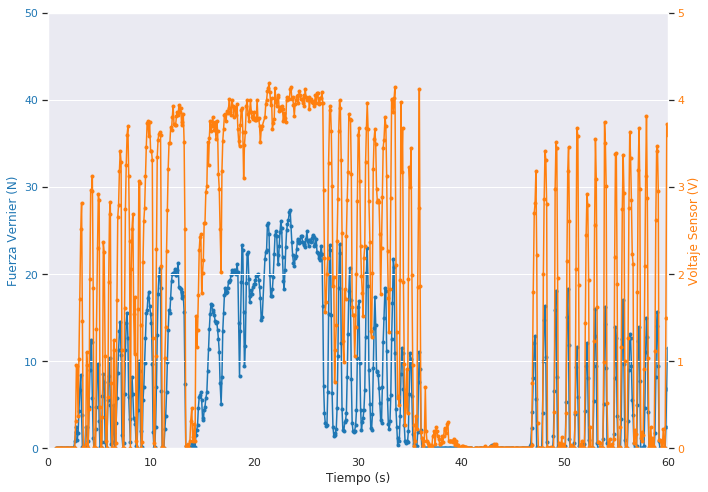

<Figure size 720x504 with 0 Axes>

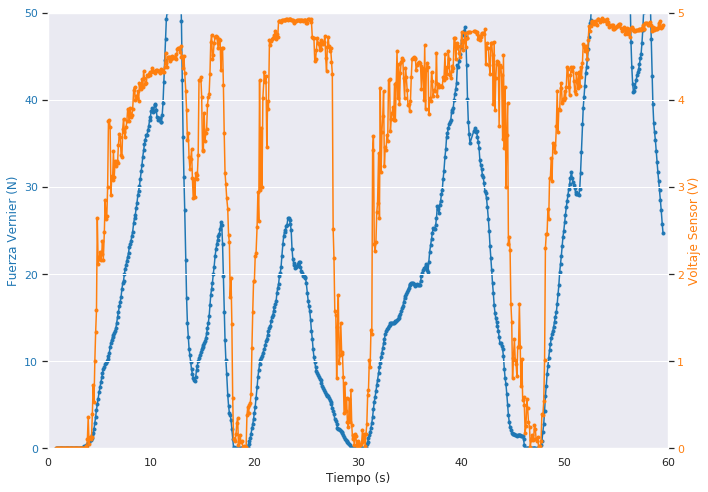

<Figure size 720x504 with 0 Axes>

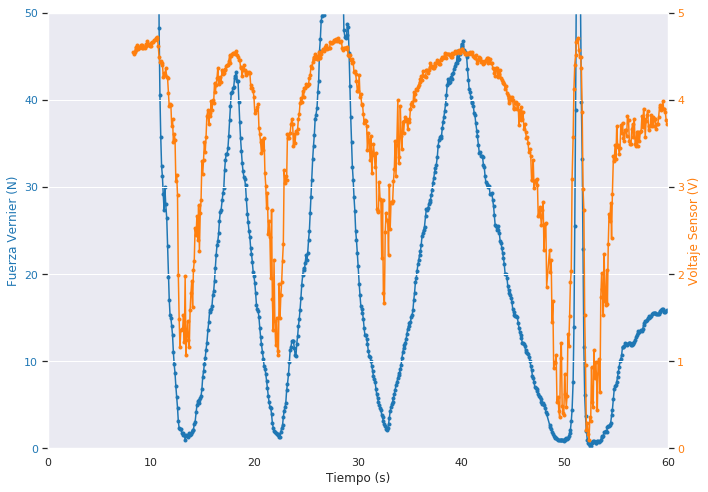

<Figure size 720x504 with 0 Axes>

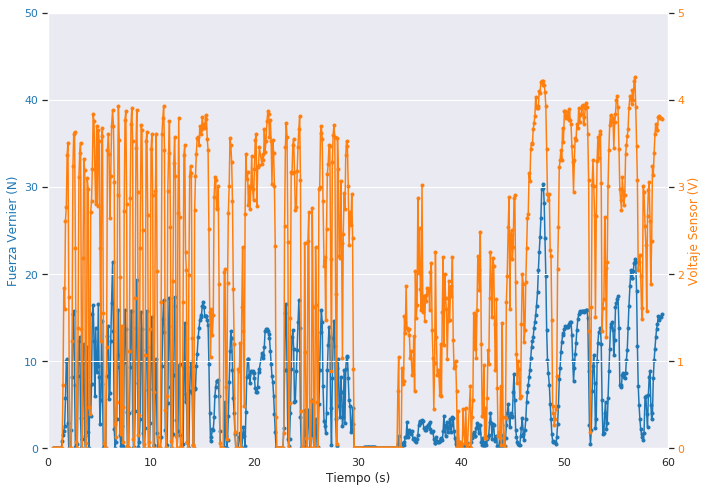

<Figure size 720x504 with 0 Axes>

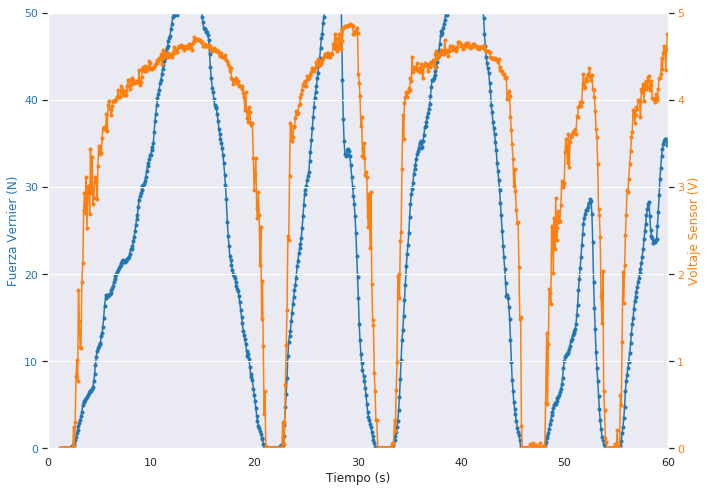

<Figure size 720x504 with 0 Axes>

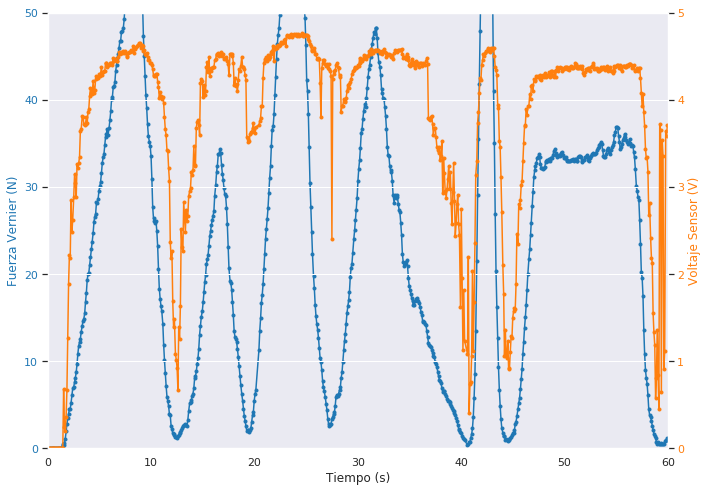

<Figure size 720x504 with 0 Axes>

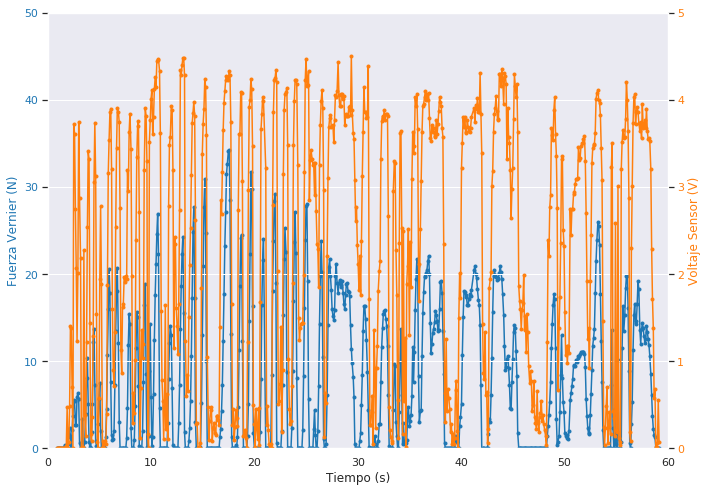

<Figure size 720x504 with 0 Axes>

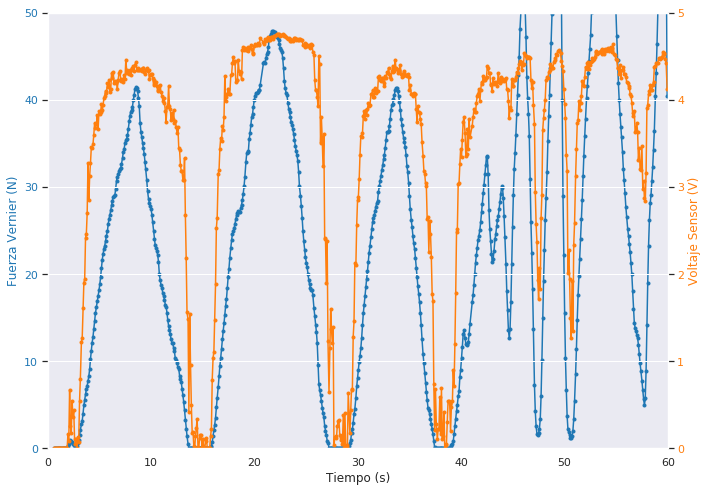

<Figure size 720x504 with 0 Axes>

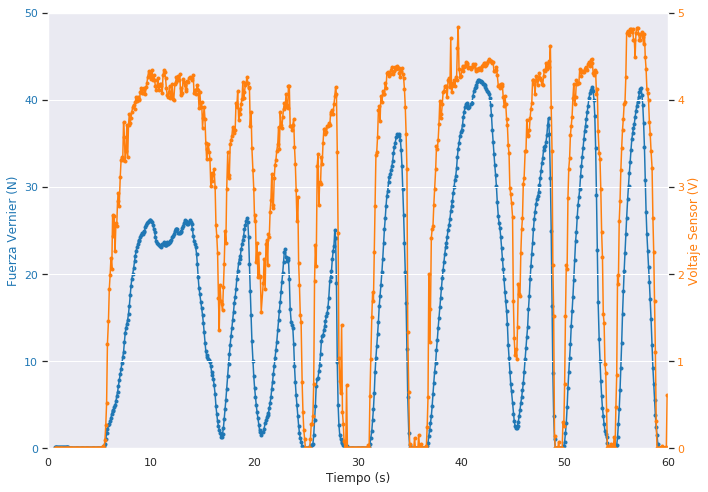

<Figure size 720x504 with 0 Axes>

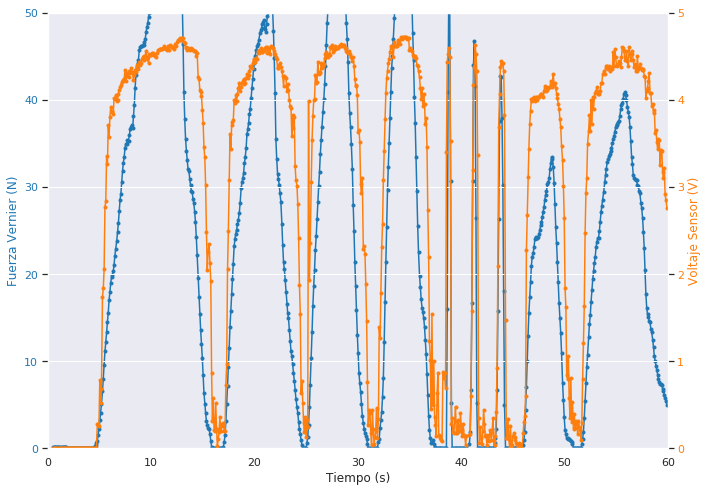

<Figure size 720x504 with 0 Axes>

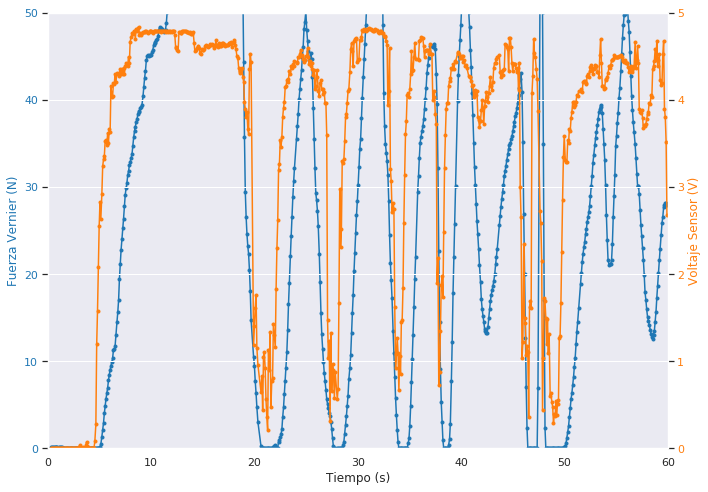

In [9]:

for i in range(12):  
  plt.figure(figsize=(10,7))
  fig, ax1 = plt.subplots(figsize=(10,7))
  num=i

  color = 'tab:blue'
  ax1.set_xlabel('Tiempo (s)')
  ax1.set_ylabel('Fuerza Vernier (N)', color=color)
  ax1.plot(Tiempo_Vernier[num],Fuerza_Vernier[num],'.-',label='Vernier', color=color)
  ax1.tick_params(axis='y', labelcolor=color)
  ax1.set_ylim(0,50)

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:orange'
  ax2.set_ylabel('Voltaje Sensor (V)', color=color)  # we already handled the x-label with ax1
  ax2.plot(Tiempo_Sensor[num],Voltaje_Sensor[num],'.-',label='Sensor', color=color)
  ax2.tick_params(axis='y', labelcolor=color)
  ax2.set_ylim(0,5)
  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  ax1.grid()
  plt.xlim(0,60)
  plt.show()

In [0]:
"""
plt.figure(figsize=(12,15))

for i in largo: 
  plt.subplot(7,2,i)
  plt.plot(eval('tanda'+str(i)).tiempo/1000, eval('tanda'+str(i)).lectura*5/1023, 'g')
  plt.plot(eval('data'+str(i)).tiempo, eval('data'+str(i)).lectura, 'y')
  plt.grid()
  plt.xlabel('Tiempo (seg)')
  plt.ylabel('Voltaje (V)')
  


plt.show()
"""

"\nplt.figure(figsize=(12,15))\n\nfor i in largo: \n  plt.subplot(7,2,i)\n  plt.plot(eval('tanda'+str(i)).tiempo/1000, eval('tanda'+str(i)).lectura*5/1023, 'g')\n  plt.plot(eval('data'+str(i)).tiempo, eval('data'+str(i)).lectura, 'y')\n  plt.grid()\n  plt.xlabel('Tiempo (seg)')\n  plt.ylabel('Voltaje (V)')\n  \n\n\nplt.show()\n"

<Figure size 1152x648 with 0 Axes>

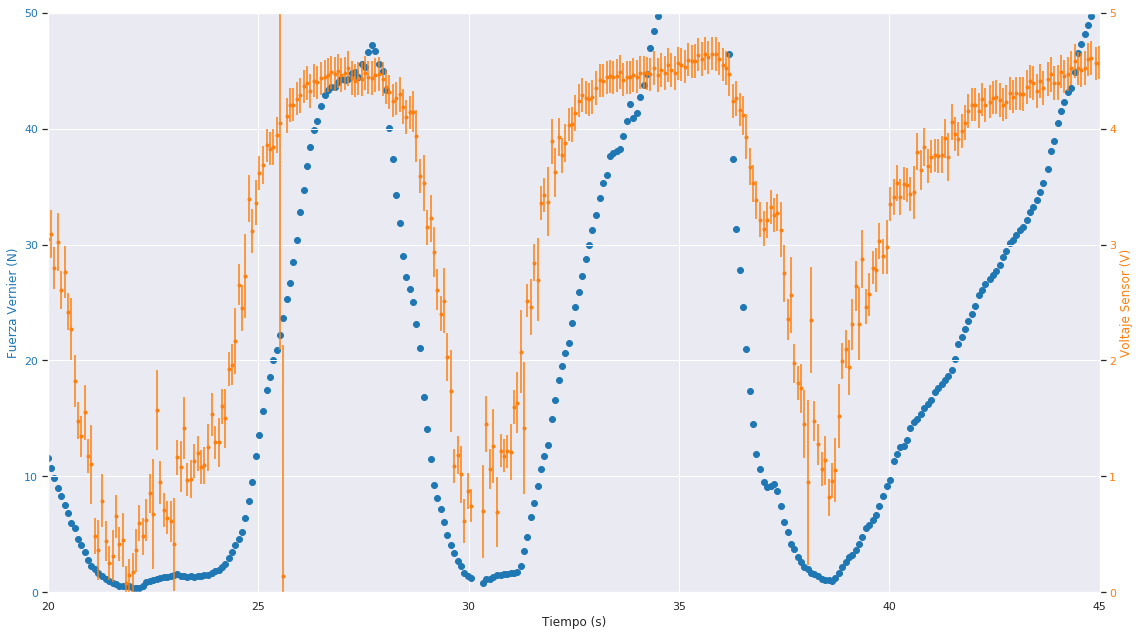

In [10]:

plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots(figsize=(16,9))
num=0

color = 'tab:blue'
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Fuerza Vernier (N)', color=color)
ax1.errorbar(Tiempo_Vernier[num],Fuerza_Vernier[num], yerr=err_Fuerza*np.ones(len(Fuerza_Vernier[num])), fmt='o',label='Vernier', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0,50)
plt.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Voltaje Sensor (V)', color=color)  # we already handled the x-label with ax1
ax2.errorbar(Tiempo_Sensor[num],Voltaje_Sensor[num], yerr=Error_Voltaje[num] , fmt='.',label='Sensor', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,5)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.grid()
plt.xlim(20,45)

plt.savefig('cals1_L.png')
plt.show()

<Figure size 1152x648 with 0 Axes>

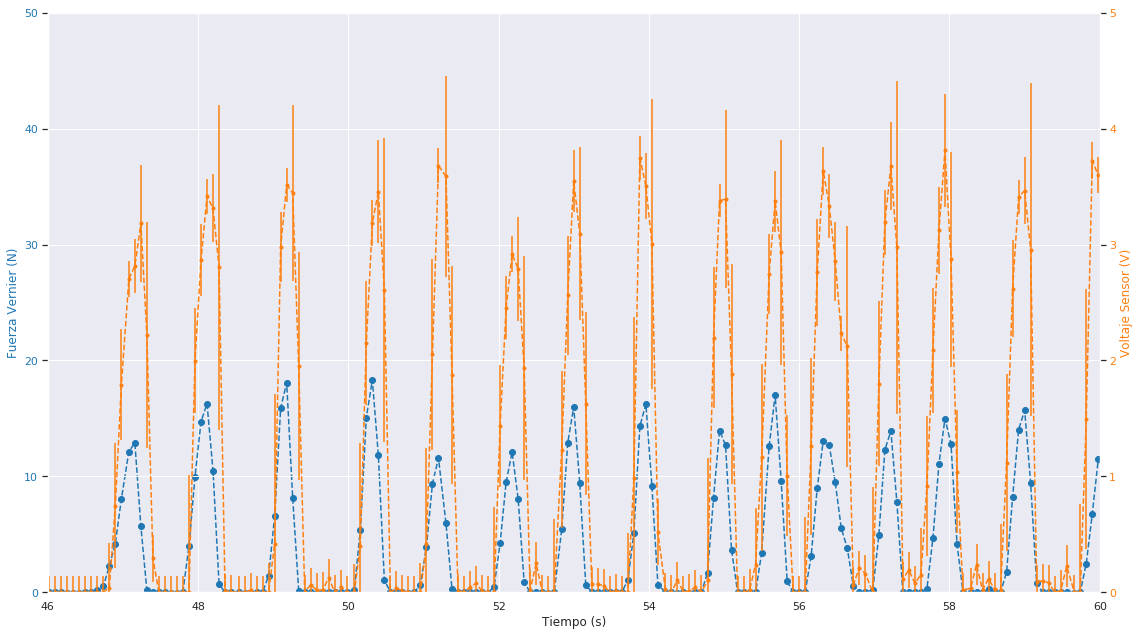

In [11]:
plt.figure(figsize=(16,9))
fig, ax1 = plt.subplots(figsize=(16,9))
num=1

color = 'tab:blue'
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Fuerza Vernier (N)', color=color)
ax1.errorbar(Tiempo_Vernier[num],Fuerza_Vernier[num], yerr=err_Fuerza*np.ones(len(Fuerza_Vernier[num])), fmt='o--',label='Vernier', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0,50)
plt.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Voltaje Sensor (V)', color=color)  # we already handled the x-label with ax1
ax2.errorbar(Tiempo_Sensor[num],Voltaje_Sensor[num], yerr=Error_Voltaje[num] , fmt='.--',label='Sensor', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,5)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.grid()
plt.xlim(46,60)

plt.savefig('cals1_R.png')
plt.show()

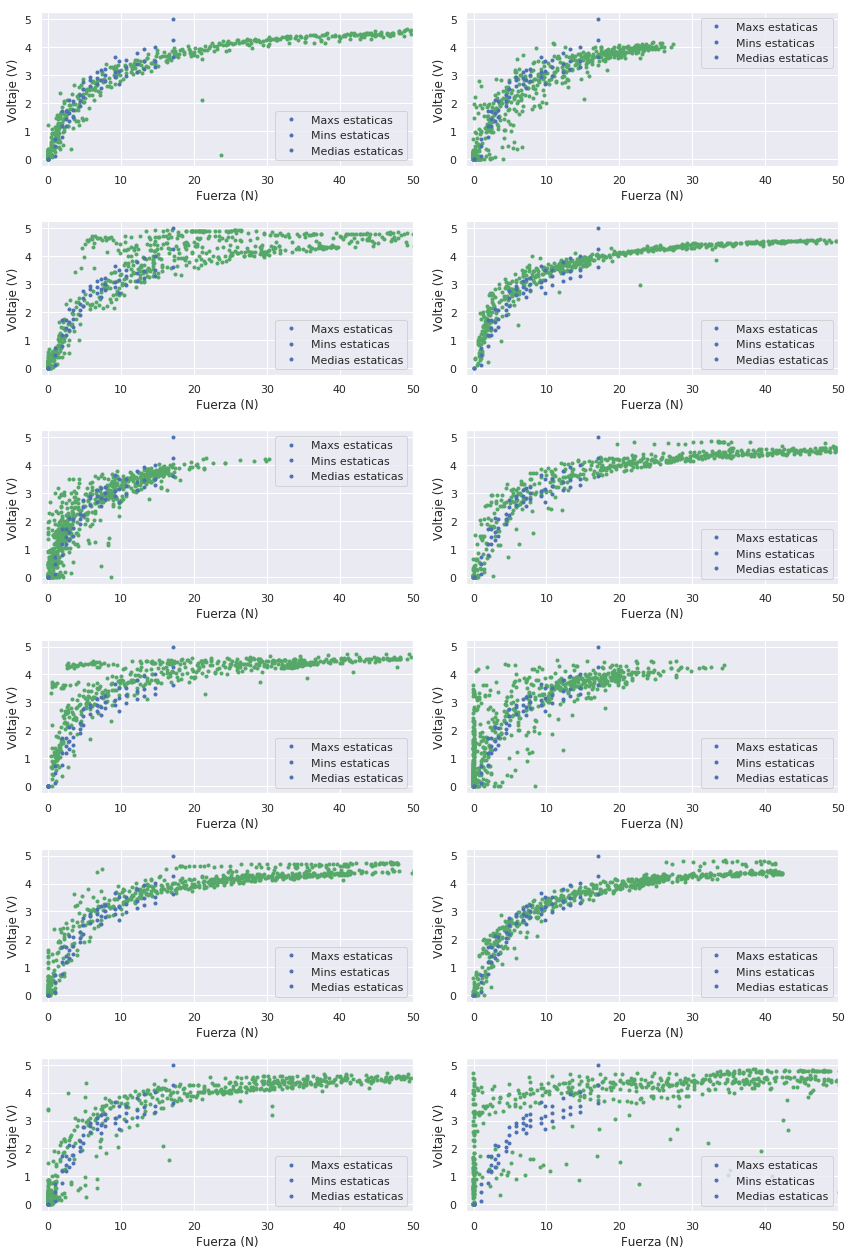

In [12]:
plt.figure(figsize=(12,20))
for i in range(12):
  plt.subplot(7,2,i+1)
  med = i
  plt.plot(Fuerza_Vernier[med],Voltaje_Sensor[med],'g.')
  plt.plot(data15[0,:], data15[1,:], 'b.', label=('Maxs estaticas'))
  plt.plot(data16[0,:], data16[1,:], 'b.', label=('Mins estaticas'))
  plt.plot(data17[0,:], data17[1,:], 'b.', label=('Medias estaticas'))
  plt.grid()
  plt.legend()
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Voltaje (V)')
  plt.xlim(-1,50)
  plt.tight_layout()
  plt.grid()
  
plt.show()

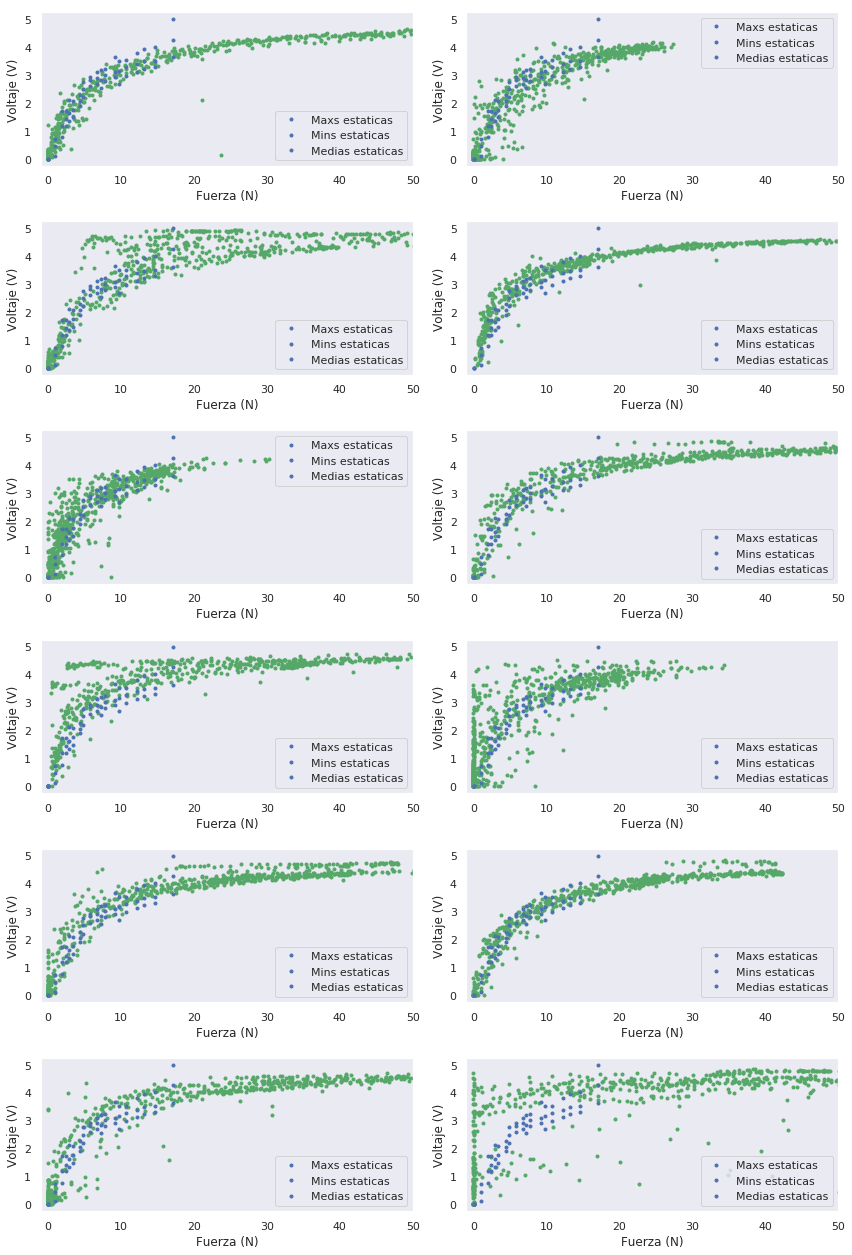

In [13]:
plt.figure(figsize=(12,20))
for i in range(12):
  plt.subplot(7,2,i+1)
  med = i
  plt.plot(Fuerza_Vernier[med],np.array(Voltaje_Sensor[med])[np.where(np.array(Tiempo_Sensor[med])<60)],'g.')
  plt.plot(data15[0,:], data15[1,:], 'b.', label=('Maxs estaticas'))
  plt.plot(data16[0,:], data16[1,:], 'b.', label=('Mins estaticas'))
  plt.plot(data17[0,:], data17[1,:], 'b.', label=('Medias estaticas'))
  plt.legend()
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Voltaje (V)')
  plt.xlim(-1,50)
  plt.tight_layout()
  plt.grid()
  
plt.show()

In [0]:
numero=[0,1,9,3,4,10,6,7,11]
#Tiempo_Sensor[numero], Voltaje_Sensor[numero], Tiempo_Vernier[numero], Fuerza_Vernier[numero]
dict_Vernier=[]
for j in numero:
  dict_Vernier.append(dict({ i: float(Fuerza_Vernier[j][i]) for i  in range(len(Fuerza_Vernier[j]))}))

In [0]:
Indices=[]
for i in range(9):
  forces=sorted(set(sorted(dict_Vernier[i].values())))

  indices_ordenados=[]
  for j in forces:
    for index, force in dict_Vernier[i].items():
      if force == j:
        indices_ordenados.append(index)
  Indices.append(indices_ordenados)

In [0]:
Fuerza_ordenada=[]
Voltaje_ordenado=[]
Error_ordenado=[]
for i in range(9):
  Fuerza_aux=[]
  Voltaje_aux=[]
  Error_aux=[]
  for ind in Indices[i]:
    if Fuerza_Vernier[numero[i]][ind]<50:
      Fuerza_aux.append(Fuerza_Vernier[numero[i]][ind])
      Voltaje_aux.append(Voltaje_Sensor[numero[i]][ind])
      Error_aux.append(Error_Voltaje[numero[i]][ind])
  Fuerza_ordenada.append(Fuerza_aux)
  Voltaje_ordenado.append(Voltaje_aux)
  Error_ordenado.append(Error_aux)

In [0]:
def expo(x, d, e, f):
  y = d - (e/f)*(1- np.exp(-f*x))
  return y

def inversa(y, a, b, c):
  x = (-1/c)*np.log(1+(c/b)*(y-a))
  return x

def df_exp(x,params):
  b=params[1]
  c=params[2]
  df=np.zeros(4)
  df[0]=-b*np.exp(-c*x)
  df[1]=1
  df[2]=-(1-np.exp(-c*x))/c
  df[3]=b*np.exp(-c*x)*(np.exp(c*x)-c*x-1)/(c**2)
  return df

def prediccion_exp(x,error_x,params,cov_params):
    df=df_exp(x,params)
    Y=params[0]-params[1]*(1-np.exp(-params[2]*x))/params[2]
    sigma_Y=np.sqrt((df[0]*error_x)**2+(df[1]**2)*cov_params[0,0]
                    +((df[2]**2)*cov_params[1,1])+((df[3]**2)*cov_params[2,2])
                   +2*df[1]*df[2]*cov_params[0,1]+2*df[1]*df[3]*cov_params[0,2]
                    +2*df[2]*df[3]*cov_params[1,2])
    return(Y,sigma_Y)


In [1]:
parametros = []
covarianza = []
for i in range(9):
  #err=np.ones(len(Voltaje_ordenado[i]))*err_Voltaje
  popt, pcov = curve_fit(expo, Fuerza_ordenada[i],Voltaje_ordenado[i], p0=[  0,   -0.5,  0.1], sigma=Error_ordenado[i])#p0=[0, 0.3],
  d,e,f=popt[0], popt[1], popt[2]
  parametros.append([d,e,f])
  covarianza.append(pcov)

#print(d,e,f)
#print(a_aj, err_a, b_aj, err_b, c_aj, err_c)

NameError: ignored

In [0]:
xp=np.linspace(0,50,1001)
yp,sigma_yp=np.zeros(len(xp)),np.zeros(len(xp))

banda_u = []
banda_l = []

for j in range(9):
  banda_u_aux = []
  banda_l_aux = []
  for i in range(len(xp)):
    yp[i],sigma_yp[i]=prediccion_exp(xp[i],0.1,parametros[j],covarianza[j])
    banda_u_aux.append(yp[i]+sigma_yp[i])
    banda_l_aux.append(yp[i]-sigma_yp[i])
  banda_u.append(banda_u_aux)
  banda_l.append(banda_l_aux)

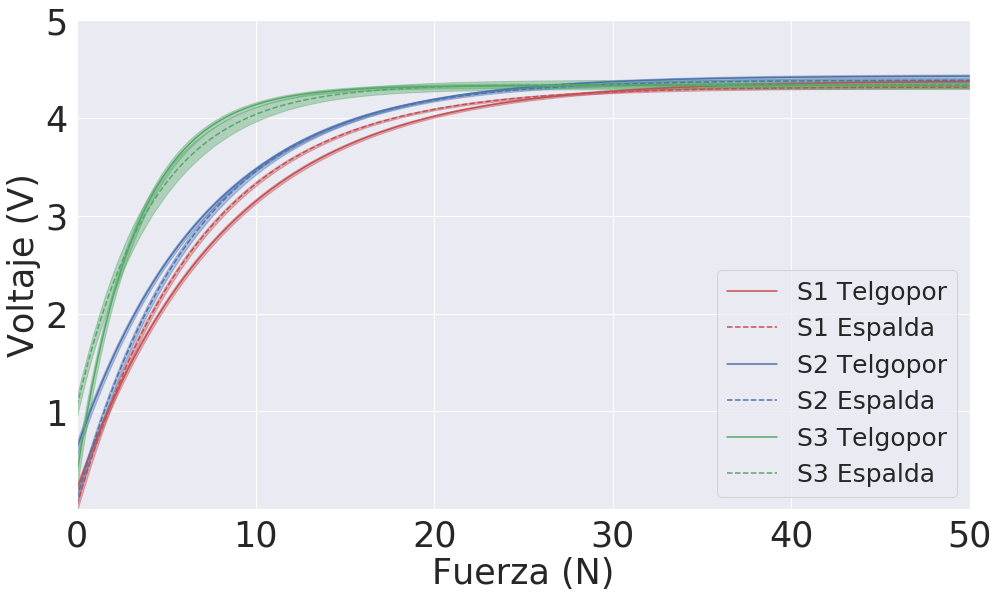

In [30]:

label=['S1 Telgopor', 'S1 Telgopor', 'S1 Espalda', 'S2 Telgopor', 'S2 Telgopor', 'S2 Espalda', 'S3 Telgopor', 'S3 Telgopor', 'S3 Espalda']
fmt = ['r', 'r--', 'r--', 'b', 'b--', 'b--', 'g', 'g--', 'g--']
fmt_banda=['r', 'r', 'r', 'b', 'b', 'b', 'g', 'g', 'g']
plt.figure(figsize=(16,9))
for i in [0,2,3,5,6,8]:
  
  #plt.plot(Fuerza_ordenada[i], Voltaje_ordenado[i], 'y.')
  plt.plot(xp,expo(xp,parametros[i][0],parametros[i][1],parametros[i][2]), fmt[i], label=label[i])
  plt.legend()
  plt.rc('legend', fontsize=25)
  plt.grid()
  #plt.plot(xp,banda_u[i],fmt_banda[i])
  #plt.plot(xp,banda_l[i],fmt_banda[i])
  plt.fill_between(xp, banda_l[i], banda_u[i], color=fmt_banda[i], alpha=0.4)
  plt.xticks([0,10,20,30,40, 50])
  plt.yticks([1,2,3,4,5])
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Voltaje (V)')
  plt.rc('axes', labelsize=35)
  plt.rc('xtick', labelsize=35)
  plt.rc('ytick', labelsize=35)
  plt.xlim((0,50))
  plt.ylim((0,5))

plt.savefig('cal_L_tJ.png')
  
plt.show()


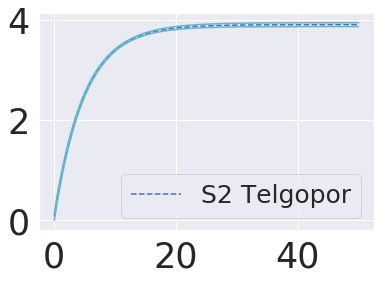

In [31]:
i=4
plt.figure()
plt.plot(xp,expo(xp,parametros[i][0],parametros[i][1],parametros[i][2]), fmt[i], label=label[i])
  
plt.legend()
plt.plot(xp,banda_u[i],'c')
plt.plot(xp,banda_l[i],'c')
plt.show()

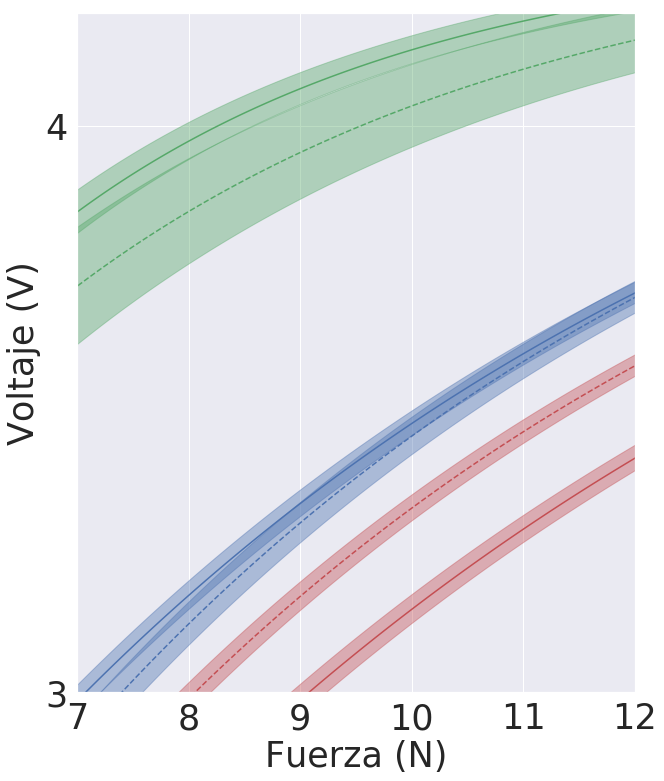

In [32]:

label=['S1 Telgopor', 'S1 Telgopor', 'S1 Espalda', 'S2 Telgopor', 'S2 Telgopor', 'S2 Espalda', 'S3 Telgopor', 'S3 Telgopor', 'S3 Espalda']
fmt = ['r', 'r--', 'r--', 'b', 'b--', 'b--', 'g', 'g--', 'g--']
fmt_banda=['r', 'r', 'r', 'b', 'b', 'b', 'g', 'g', 'g']
plt.figure(figsize=(10,12.5))
for i in [0,2,3,5,6,8]:
  
  #plt.plot(Fuerza_ordenada[i], Voltaje_ordenado[i], 'y.')
  plt.plot(xp,expo(xp,parametros[i][0],parametros[i][1],parametros[i][2]), fmt[i], label=label[i])
  #plt.legend()
  plt.rc('legend', fontsize=25)
  plt.grid()
  #plt.plot(xp,banda_u[i],fmt_banda[i])
  #plt.plot(xp,banda_l[i],fmt_banda[i])
  plt.fill_between(xp, banda_l[i], banda_u[i], color=fmt_banda[i], alpha=0.4)
  plt.xticks([7,8,9,10,11,12])
  plt.yticks([1,2,3,4,5])
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Voltaje (V)')
  plt.rc('axes', labelsize=35)
  plt.rc('xtick', labelsize=35)
  plt.rc('ytick', labelsize=35)
  plt.xlim((7,12))
  plt.ylim((3,4.2))

plt.savefig('cal_L_tJ_zoom.png')
  
plt.show()

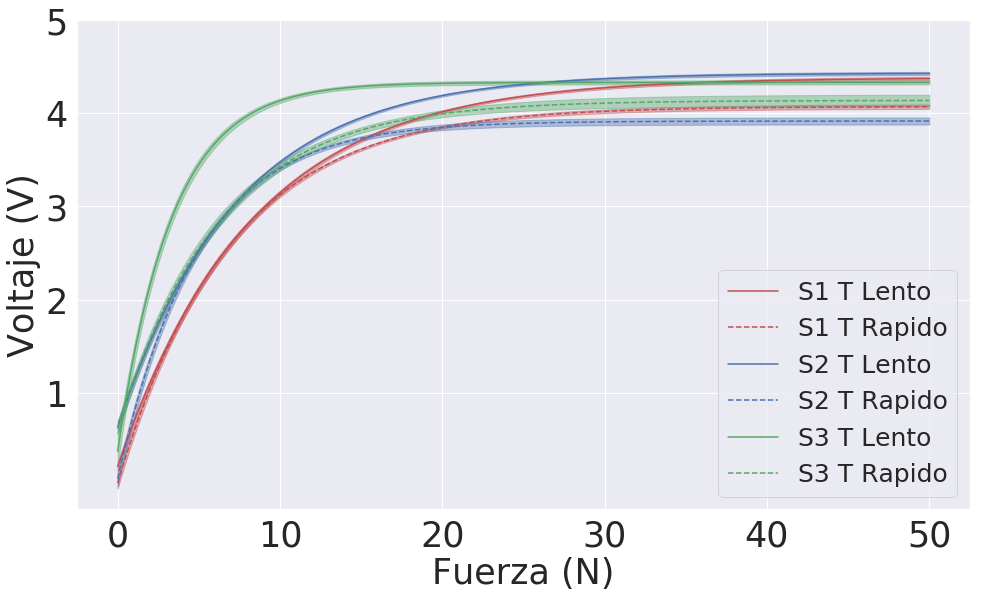

In [33]:

label=['S1 T Lento', 'S1 T Rapido', 'S1 Espalda', 'S2 T Lento', 'S2 T Rapido', 'S2 Espalda', 'S3 T Lento', 'S3 T Rapido', 'S3 Espalda']
fmt = ['r', 'r--', 'r--', 'b', 'b--', 'b--', 'g', 'g--', 'g--']
fmt_banda=['r', 'r', 'r', 'b', 'b', 'b', 'g', 'g', 'g']
plt.figure(figsize=(16,9))
for i in [0,1,3,4,6,7]:
  
  #plt.plot(Fuerza_ordenada[i], Voltaje_ordenado[i], 'y.')
  plt.plot(xp,expo(xp,parametros[i][0],parametros[i][1],parametros[i][2]), fmt[i], label=label[i])
  plt.legend()
  plt.rc('legend', fontsize=25)
  plt.grid()
  #plt.plot(xp,banda_u[i],fmt_banda[i])
  #plt.plot(xp,banda_l[i],fmt_banda[i])
  plt.fill_between(xp, banda_l[i], banda_u[i], color=fmt_banda[i], alpha=0.4)
  plt.xticks([0,10,20,30,40, 50])
  plt.yticks([1,2,3,4,5])
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Voltaje (V)')
  plt.rc('axes', labelsize=35)
  plt.rc('xtick', labelsize=35)
  plt.rc('ytick', labelsize=35)

#plt.savefig('cal_LR_t.png')
  
plt.show()

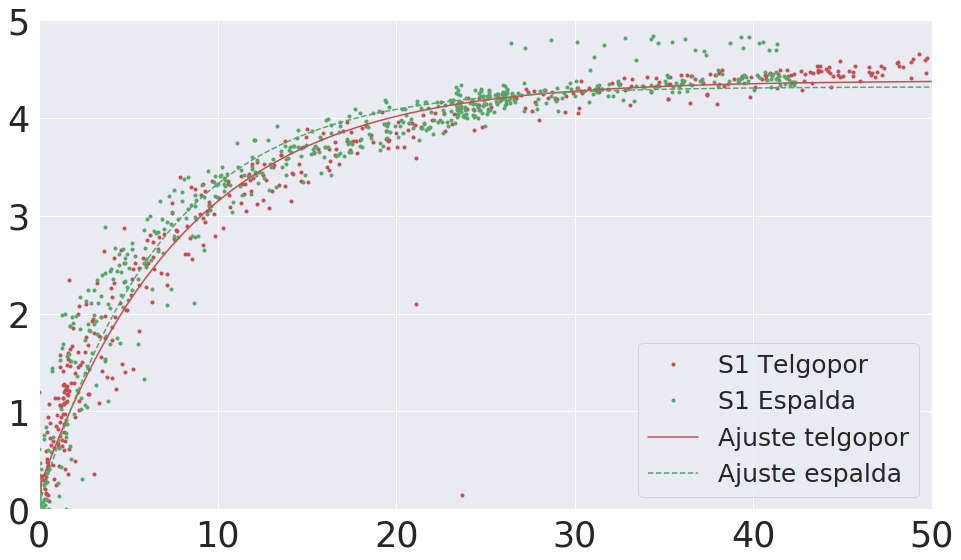

In [36]:
#x_p=np.linspace(0,40,1001)
label=['S1 Telgopor', 'S1 Telgopor', 'S1 Espalda', 'S2 Telgopor', 'S2 Telgopor', 'S2 Espalda', 'S3 Telgopor', 'S3 Telgopor', 'S3 Espalda']
fmt = ['r', 'r--', 'g--', 'r', 'b--', 'g--', 'r', 'g--', 'g--']
fmt_banda=['r', 'r', 'g', 'r', 'b', 'g', 'r', 'g', 'g']
i=0 #0, 3 o 6

plt.figure(figsize=(16,9))

#plt.errorbar(Fuerza_ordenada[i], Voltaje_ordenado[i], yerr=Error_ordenado[i], fmt='r.', label=label[i])
#plt.errorbar(Fuerza_ordenada[i+2], Voltaje_ordenado[i+2],yerr=Error_ordenado[i+2],fmt= 'g.', label=label[i+2])
plt.plot(Fuerza_ordenada[i], Voltaje_ordenado[i], 'r.', label=label[i])
plt.plot(Fuerza_ordenada[i+2], Voltaje_ordenado[i+2],'g.', label=label[i+2])
plt.plot(xp,expo(xp,parametros[i][0],parametros[i][1],parametros[i][2]), fmt[i], label='Ajuste telgopor')
plt.plot(xp,expo(xp,parametros[i+2][0],parametros[i+2][1],parametros[i+2][2]), fmt[i+2], label='Ajuste espalda')
plt.grid()
plt.ylim((0,5))
plt.xlim((0,50))
#plt.plot(x_p,pol(x_p,coef[i][0],coef[i][1],coef[i][2],coef[i][3],coef[i][4],coef[i][5]), fmt[i], label=label[i])
plt.grid()
plt.legend()
  

In [0]:
ventana = 10
maxs,mins,meds,masa_maxs,masa_mins,masa_meds,ind_maxs,ind_mins,ind_meds=[],[],[],[],[],[],[],[],[]

for j in range(6):
  for i in range(len(Fuerza_ordenada[j])-ventana):
    maxs.append(np.max(Voltaje_ordenado[j][i:i+ventana]))
    mins.append(np.min(Voltaje_ordenado[j][i:i+ventana]))
    meds.append(np.median(Voltaje_ordenado[j][i:i+ventana]))
    ind_maxs.append(i+np.where(np.array(Voltaje_ordenado[j][i:i+ventana]==maxs[-1]))[0][-1])
    ind_mins.append(i+np.where(np.array(Voltaje_ordenado[j][i:i+ventana]==mins[-1]))[0][-1])
    ind_meds.append(int(i+ventana/2))
    masa_maxs.append(Fuerza_ordenada[j][ind_maxs[-1]])
    masa_mins.append(Fuerza_ordenada[j][ind_mins[-1]])
    masa_meds.append(Fuerza_ordenada[j][ind_meds[-1]])

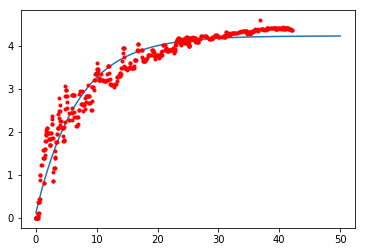

In [0]:
x_p=np.linspace(0,50,1001)

plt.plot(x_p,expo(x_p,d,e,f))
plt.plot(masa_meds,meds9,'.r')

In [0]:
(5/0.1)*(1- np.exp(-0.1*50))

49.66310265004573

In [0]:
def pol(x, a, b, c, d,e,f):
  
  y = a*x**6 + b*x**5 + c*x**4 + d*x**3+e*x**2+f*x
  return y

def expo(x, d, e, f):
  y = d - (e/f)*(1- np.exp(-f*x))
  return y

def inversa(y, a, b, c):
  x = (-1/c)*np.log(1+(c/b)*(y-a))
  return x

def df_exp(x,params):
  b=params[1]
  c=params[2]
  df=np.zeros(4)
  df[0]=-b*np.exp(-c*x)
  df[1]=1
  df[2]=-(1-np.exp(-c*x))/c
  df[3]=b*np.exp(-c*x)*(np.exp(c*x)-c*x-1)/(c**2)
  return df

def prediccion_exp(x,error_x,params,cov_params):
    df=df_exp(x,params)
    Y=params[0]-params[1]*(1-np.exp(-params[2]*x))/params[2]
    sigma_Y=np.sqrt((df[0]*error_x)**2+(df[1]**2)*cov_params[0,0]
                    +((df[2]**2)*cov_params[1,1])+((df[3]**2)*cov_params[2,2])
                   +2*df[1]*df[2]*cov_params[0,1]+2*df[1]*df[3]*cov_params[0,2]
                    +2*df[2]*df[3]*cov_params[1,2])
    return(Y,sigma_Y)

  
def prediccion_pol(x,params,cov_params):
    df=df_pol(x,params)
    Y=params[0]*x**6+params[1]*x**5+params[2]*x**4+params[3]*x**3+params[4]*x**2+params[5]*x
    sigma_Y=np.sqrt((df[0]**2)*cov_params[0,0]+(df[1]**2)*cov_params[1,1]
                    +(df[2]**2)*cov_params[2,2]+(df[3]**2)*cov_params[3,3]
                    +(df[4]**2)*cov_params[4,4]+(df[5]**2)*cov_params[5,5]
                   +2*df[0]*df[1]*cov_params[0,1]+2*df[0]*df[2]*cov_params[0,2]
                    +2*df[0]*df[3]*cov_params[0,3]+2*df[0]*df[4]*cov_params[0,4]
                   +2*df[0]*df[5]*cov_params[0,5]+2*df[1]*df[2]*cov_params[1,2]
                   +2*df[1]*df[3]*cov_params[1,3]+2*df[1]*df[4]*cov_params[1,4]
                   +2*df[1]*df[5]*cov_params[1,5]+2*df[2]*df[3]*cov_params[2,3]
                   +2*df[2]*df[4]*cov_params[2,4]+2*df[2]*df[5]*cov_params[2,5]
                   +2*df[3]*df[4]*cov_params[3,4]+2*df[3]*df[5]*cov_params[3,5]
                   +2*df[4]*df[5]*cov_params[4,5])
    return(Y,sigma_Y)


def df_pol(x,params):
  a=params[0]
  b=params[1]
  c=params[2]
  d=params[3]
  e=params[4]
  f=params[5]
  
  
  df=np.zeros(6)
  df[0]=6*a*x**5
  df[1]=5*b*x**4
  df[2]=4*c*x**3
  df[3]=3*d*x**2
  df[4]=2*e*x
  df[5]=f
  return(df)

In [0]:
err=np.ones(len(meds9))*err_Fuerza
popt, pcov = curve_fit(pol, masa_meds,meds9, p0=[  0, 0,  4.21500180e-01,  4.60688382e-01], sigma=err)#p0=[0, 0.3],
a,b,c,d=popt[0], popt[1], popt[2],popt[3]

print(a,b,c,d)
#print(a_aj, err_a, b_aj, err_b, c_aj, err_c)

-1.2418491567586326e-05 0.0011955762104495073 -0.041036583598210954 0.6332315206863969


In [0]:
pocosmedsx=[]
pocosmedsy=[]
for i in range(len(meds9)):
  if i%30==0:
    pocosmedsy.append(meds9[i])
    pocosmedsx.append(masa_meds[i])

In [0]:
parametros = []
covarianza = []
for i in range(6):
  #err=np.ones(len(Voltaje_ordenado[i]))*err_Voltaje
  popt, pcov = curve_fit(expo, Fuerza_ordenada[i],Voltaje_ordenado[i], p0=[  0,   -0.5,  0.1], sigma=Error_ordenado[i])#p0=[0, 0.3],
  d,e,f=popt[0], popt[1], popt[2]
  parametros.append([d,e,f])
  covarianza.append(pcov)

#print(d,e,f)
#print(a_aj, err_a, b_aj, err_b, c_aj, err_c)

In [0]:
coef = []
cov = []
for i in range(6):
  #err=np.ones(len(Voltaje_ordenado[i]))*err_Voltaje
  popt, pcov = curve_fit(pol, Fuerza_ordenada[i],Voltaje_ordenado[i], p0=[ -5.85926410e-09,  1.06923105e-06, -7.73733453e-05,  2.83706947e-03,
 -5.66273866e-02 , 6.46158354e-01], sigma=Error_ordenado[i])#p0=[0, 0.3],
  A,B,C,D,E,F=popt[0], popt[1], popt[2],popt[3], popt[4], popt[5]
  coef.append([A,B,C,D,E,F])
  cov.append(pcov)

In [0]:
coef[0],cov[0]

([-1.204089379832167e-08,
  2.0054140622319734e-06,
  -0.00013091096880508632,
  0.004270477878675223,
  -0.07480474160302139,
  0.7460498619393294],
 array([[ 3.54643944e-18, -5.06878297e-16,  2.68911932e-14,
         -6.45716560e-13,  6.74100483e-12, -2.27334610e-11],
        [-5.06878297e-16,  7.29784660e-14, -3.90625997e-12,
          9.48466529e-11, -1.00460179e-09,  3.45674722e-09],
        [ 2.68911932e-14, -3.90625997e-12,  2.11402129e-10,
         -5.20586504e-09,  5.61894172e-08, -1.98629342e-07],
        [-6.45716560e-13,  9.48466529e-11, -5.20586504e-09,
          1.30596196e-07, -1.44615444e-06,  5.31028987e-06],
        [ 6.74100483e-12, -1.00460179e-09,  5.61894172e-08,
         -1.44615444e-06,  1.66140339e-05, -6.46092025e-05],
        [-2.27334610e-11,  3.45674722e-09, -1.98629342e-07,
          5.31028987e-06, -6.46092025e-05,  2.76526475e-04]]))

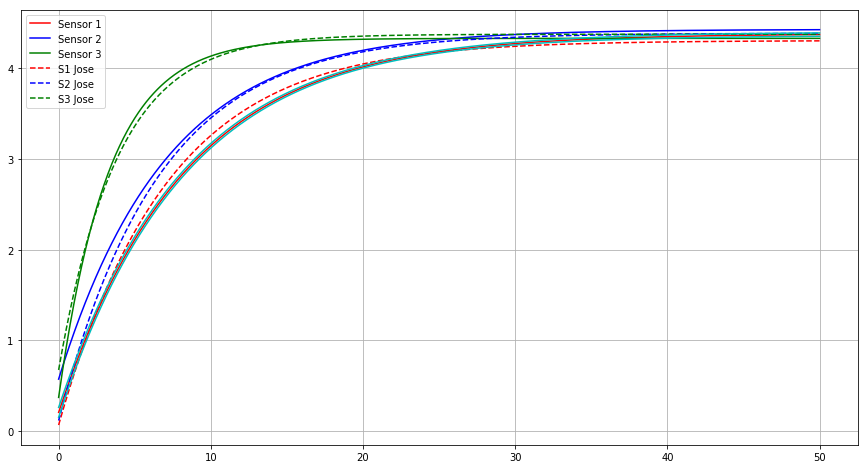

In [0]:
x_p=np.linspace(0,50,1001)

label=['Sensor 1', 'Sensor 2', 'Sensor 3', 'S1 Jose', 'S2 Jose', 'S3 Jose']
fmt = ['r', 'b', 'g', 'r--', 'b--', 'g--']
plt.figure(figsize=(15,8))
for i in range(6):
  
  #plt.plot(Fuerza_ordenada[i], Voltaje_ordenado[i], 'y.')
  plt.plot(x_p,expo(x_p,parametros[i][0],parametros[i][1],parametros[i][2]), fmt[i], label=label[i])
  
  plt.legend()
plt.plot(xp,banda_u,'c')

plt.plot(xp,banda_l,'c')
plt.grid()
plt.show()

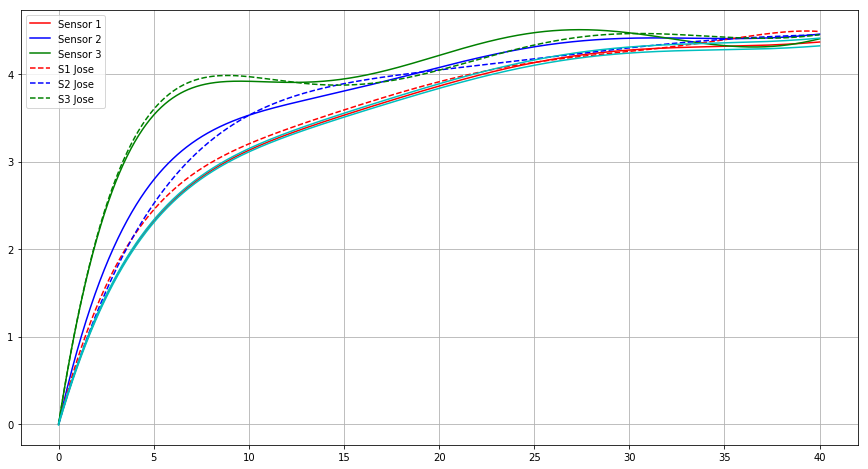

In [0]:
x_p=np.linspace(0,40,1001)

label=['Sensor 1', 'Sensor 2', 'Sensor 3', 'S1 Jose', 'S2 Jose', 'S3 Jose']
fmt = ['r', 'b', 'g', 'r--', 'b--', 'g--']
plt.figure(figsize=(15,8))
for i in range(6):
  
  #plt.plot(Fuerza_ordenada[i], Voltaje_ordenado[i], 'y.')
  plt.plot(x_p,pol(x_p,coef[i][0],coef[i][1],coef[i][2],coef[i][3],coef[i][4],coef[i][5]), fmt[i], label=label[i])
  
  plt.legend()
plt.plot(Xp,Banda_u,'c')

plt.plot(Xp,Banda_l,'c')
plt.grid()
plt.show()

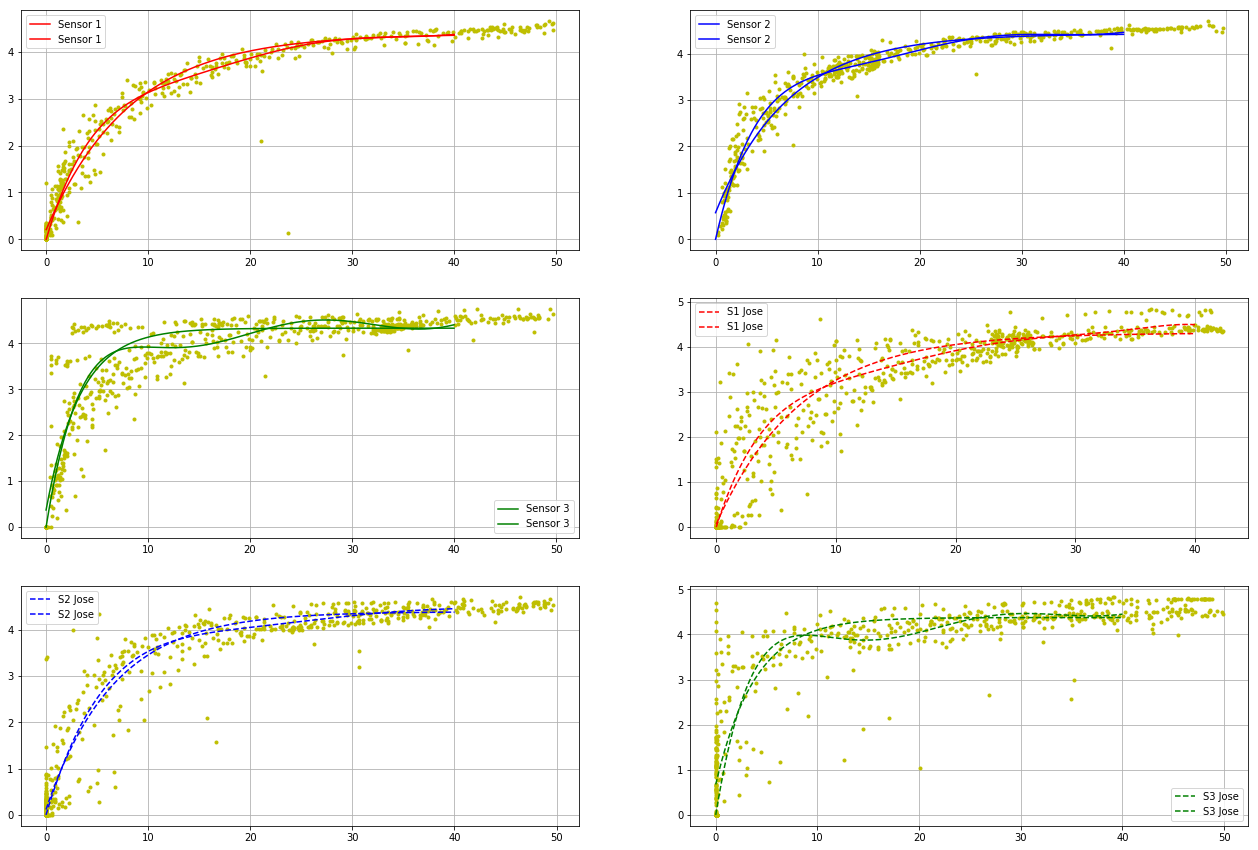

In [0]:
x_p=np.linspace(0,40,1001)

label=['Sensor 1', 'Sensor 2', 'Sensor 3', 'S1 Jose', 'S2 Jose', 'S3 Jose']
fmt = ['r', 'b', 'g', 'r--', 'b--', 'g--']
plt.figure(figsize=(22,15))
for i in range(6):
  plt.subplot(3,2,i+1)
  plt.plot(Fuerza_ordenada[i], Voltaje_ordenado[i], 'y.')
  plt.plot(x_p,expo(x_p,parametros[i][0],parametros[i][1],parametros[i][2]), fmt[i], label=label[i])
  plt.plot(x_p,pol(x_p,coef[i][0],coef[i][1],coef[i][2],coef[i][3],coef[i][4],coef[i][5]), fmt[i], label=label[i])
  plt.grid()
  plt.legend()
  
#plt.plot(masa_meds,meds9,'.r')

In [0]:
xp=np.linspace(0,50,1001)
yp,sigma_yp=np.zeros(len(xp)),np.zeros(len(xp))
j=0
#for j in range(6):
for i in range(len(xp)):
  yp[i],sigma_yp[i]=prediccion_exp(xp[i],0.1,parametros[j],covarianza[j])
banda_u=yp+sigma_yp
banda_l=yp-sigma_yp


In [0]:
Xp=np.linspace(0,40,1001)
Yp,Sigma_yp=np.zeros(len(Xp)),np.zeros(len(Xp))
j=0
#for j in range(6):
for i in range(len(Xp)):
  Yp[i],Sigma_yp[i]=prediccion_pol(Xp[i],coef[j],cov[j])
Banda_u=Yp+Sigma_yp
Banda_l=Yp-Sigma_yp

In [0]:
covarianza[0]

array([[ 8.30345175e-04,  2.80269509e-04, -4.83992310e-05],
       [ 2.80269509e-04,  2.02500200e-04, -4.72432283e-05],
       [-4.83992310e-05, -4.72432283e-05,  1.22608796e-05]])

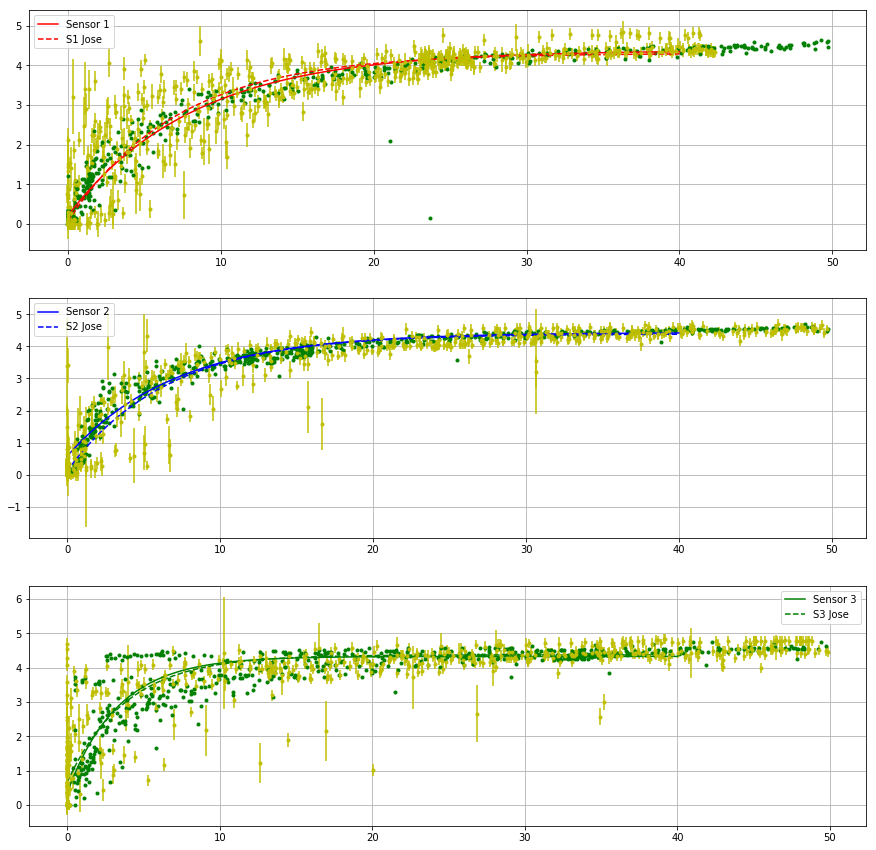

In [0]:
x_p=np.linspace(0,40,1001)

label=['Sensor 1', 'Sensor 2', 'Sensor 3', 'S1 Jose', 'S2 Jose', 'S3 Jose']
fmt = ['r', 'b', 'g', 'r--', 'b--', 'g--']
plt.figure(figsize=(15,15))
for i in range(3):
  plt.subplot(3,1,i+1)
  plt.errorbar(Fuerza_ordenada[i+3], Voltaje_ordenado[i+3],yerr=Error_ordenado[i+3],fmt= 'y.')
  plt.plot(Fuerza_ordenada[i], Voltaje_ordenado[i], 'g.')
  plt.plot(x_p,expo(x_p,parametros[i][0],parametros[i][1],parametros[i][2]), fmt[i], label=label[i])
  plt.plot(x_p,expo(x_p,parametros[i+3][0],parametros[i+3][1],parametros[i+3][2]), fmt[i+3], label=label[i+3])
  
  #plt.plot(x_p,pol(x_p,coef[i][0],coef[i][1],coef[i][2],coef[i][3],coef[i][4],coef[i][5]), fmt[i], label=label[i])
  plt.grid()
  plt.legend()
  
#plt.plot(masa_meds,meds9,'.r')

----------- PONIENDO A PRUEBA LA CALIBRACION ---------

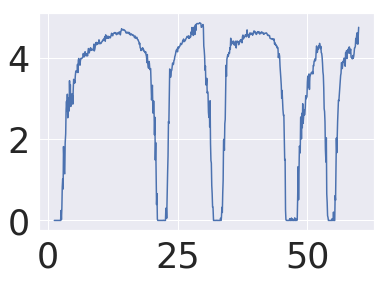

In [37]:
plt.plot(Tiempo_Sensor[5],Voltaje_Sensor[5])

In [40]:
a_cal=parametros[3][0]
b_cal=parametros[3][1]
c_cal=parametros[3][2]
cal_prediccion=[]
for volt in Voltaje_Sensor[5]:
  if volt>a_cal:
    cal_prediccion.append(inversa(volt,a_cal,b_cal,c_cal))
  else:
    cal_prediccion.append(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


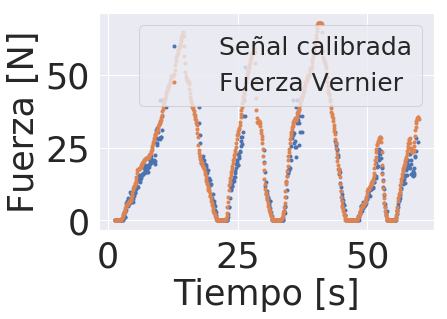

In [44]:
plt.plot(Tiempo_Sensor[5],cal_prediccion,'.',label='Señal calibrada')
plt.plot(Tiempo_Vernier[5],Fuerza_Vernier[5],'.',label='Fuerza Vernier')
plt.xlabel('Tiempo [s]')
plt.ylabel('Fuerza [N]')
plt.legend()

In [0]:
def prediccion(parametros,covarianza):
  fuerza=np.arange(0,50,0.005)
  err_f=0.05
  yp,sigma_yp,U,L=np.zeros(len(fuerza)),np.zeros(len(fuerza)),np.zeros(len(fuerza)),np.zeros(len(fuerza))
  
  for i in range(len(fuerza)):
    yp[i],sigma_yp[i]=prediccion_exp(fuerza[i],err_f,parametros,covarianza)
    U[i]=yp[i]+sigma_yp[i]
    L[i]=yp[i]-sigma_yp[i]
  return(L,U)
  
def conversion(voltajes,L,U,parametros):
  fuerza=np.arange(0,50,0.005)
  F_medio,F_inf,F_sup=[],[],[]
  for voltaje in voltajes:
    F_medio.append(inversa(voltaje,parametros[0],parametros[1],parametros[2]))
  
    if (U[0]<=voltaje)&(U[-1]>=voltaje):
      F_inf.append(fuerza[np.where(U>=voltaje)[0][0]])
    elif(U[0]>=voltaje):
      F_inf.append(0)
    else:
      F_inf.append(50)
    if (L[0]<=voltaje)&(L[-1]>=voltaje):
      F_sup.append(fuerza[np.where(L>=voltaje)[0][0]])
    elif (L[-1]<=voltaje):
      F_sup.append(1000)
    else:
      F_sup.append(L[0])
      
  inf_sup=np.zeros((2,len(F_sup)))
  inf_sup[0,:]=np.abs(np.array(F_medio)-np.array(F_inf))
  inf_sup[1,:]=np.abs(np.array(F_sup)-np.array(F_medio))
  return(F_medio,F_inf,F_sup,inf_sup)



In [175]:
help(np.matrix)

Help on class matrix in module numpy:

class matrix(ndarray)
 |  matrix(data, dtype=None, copy=True)
 |  
 |  .. note:: It is no longer recommended to use this class, even for linear
 |            algebra. Instead use regular arrays. The class may be removed
 |            in the future.
 |  
 |  Returns a matrix from an array-like object, or from a string of data.
 |  A matrix is a specialized 2-D array that retains its 2-D nature
 |  through operations.  It has certain special operators, such as ``*``
 |  (matrix multiplication) and ``**`` (matrix power).
 |  
 |  Parameters
 |  ----------
 |  data : array_like or string
 |     If `data` is a string, it is interpreted as a matrix with commas
 |     or spaces separating columns, and semicolons separating rows.
 |  dtype : data-type
 |     Data-type of the output matrix.
 |  copy : bool
 |     If `data` is already an `ndarray`, then this flag determines
 |     whether the data is copied (the default), or whether a view is
 |     constru

In [89]:
parametros[0]

[0.20732125455452075, -0.5083621908479562, 0.12178757773324396]

In [97]:
fuerza=np.arange(0,50,0.005)
fuerza[np.where(U<4.344)[0][-1]],fuerza[np.where(L>4.344)[0][0]]


(35.725, 44.015)

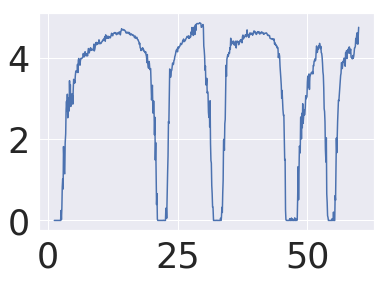

In [100]:
plt.plot(Tiempo_Sensor[5],Voltaje_Sensor[5])

In [184]:
L_5,U_5=prediccion(parametros[3],covarianza[3])
F_medio,F_inf,F_sup,inf_sup=conversion(Voltaje_Sensor[5],L_5,U_5,parametros[3])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


In [0]:
if U_5[0]<=Voltaje_Sensor[5][0]:
  print("holaa")

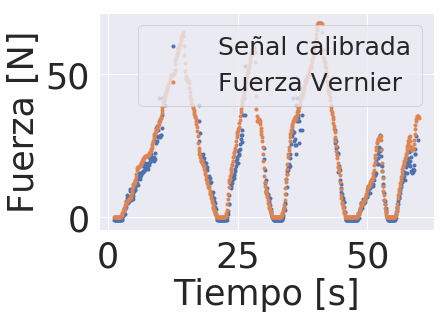

In [141]:
plt.plot(Tiempo_Sensor[5],F_medio,'.',label='Señal calibrada')
plt.plot(Tiempo_Vernier[5],Fuerza_Vernier[5],'.',label='Fuerza Vernier')
plt.xlabel('Tiempo [s]')
plt.ylabel('Fuerza [N]')
plt.legend()

In [1]:
plt.figure(figsize=(16,9))
#plt.plot(Tiempo_Sensor[5],F_medio,'.',label='Señal calibrada')
#plt.plot(Tiempo_Sensor[5],F_inf,'.',label='Señal calibrada')
#plt.plot(Tiempo_Sensor[5],F_sup,'.',label='Señal calibrada')


plt.errorbar(Tiempo_Sensor[5],F_medio,yerr=inf_sup,fmt='b.',label='Señal calibrada')
plt.errorbar(Tiempo_Vernier[5],Fuerza_Vernier[5],yerr=0.05,fmt='r.',label='Fuerza Vernier')
#plt.fill_between(Tiempo_Sensor[5], F_inf, F_sup, color='blue', alpha=0.2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Fuerza (N)')
plt.ylim(0,50)
plt.legend()

NameError: ignored